# TP2 : T'es pas cap

## 1. Variance

> On considère $n$ échantillons de longueur $k$ de loi normale standard. Pour diverses valeurs de $k$ et de $n$ comparer numériquement les estimateurs de l'écart-type vus en cours. Il faudra au préalable construire la table numérique des constantes $d_{2,k}$ et $c_{4,k}$ à l'aide d'une méthode de Monte Carlo.

Pour $i$ variant de 1 à $n$ et j de $1 à k$ on utilise la formule

$$R_i = max(X_i^j) - min(X_i^j)$$

De plus on a 

$$\hat{\sigma} = \frac{\overline{R}}{d_2(k)}$$

In [37]:
import numpy as np


n = 1000
k = 4
sigma = 1

R = []
S = []

for i in range(n):
    X_i = [sigma * np.random.randn() for _ in range(k)]
    R.append(max(X_i) - min(X_i))
    S.append(np.var(X_i))

    
# Calcul de d_2_k
R_hat = np.mean(R)
d_2_k = R_hat / sigma

print('d_2_{}: {}'.format(k, d_2_k))


# Calcul de c_4_k
S_hat = np.mean(S)
c_4_k = S_hat / sigma

print('c_4_{}: {}'.format(k, c_4_k))

d_2_4: 2.0902938249053156
c_4_4: 0.780027760910376


## 2. Calcul des capabilités

> Ecrire des fonctions permettant le calcul des différentes capabilités. Les variables d'entrée sont $T_s$, $T_i$ et la matrice des observations $(k \times n)$.

In [50]:
def capability(X, t_i, t_s):
    
    m = np.mean(X)
    s = np.std(X)
    
    c_p = (t_s - t_i) / (6 * s)
    c_p_l = (m - t_i) / (3 * s)
    c_p_u = (t_s - m) / (3 * s)
    c_p_k = min(c_p_l, c_p_u)
    
    return c_p, c_p_l, c_p_u, c_p_k

In [58]:
t_i = -1
t_s = 1
X = np.random.randn(100, 10)

c_p, c_p_l, c_p_u, c_p_k = capability(X, t_i, t_s)

print('c_p: {:.2f}'.format(c_p))
print('c_p_l: {:.2f}'.format(c_p_l))
print('c_p_u: {:.2f}'.format(c_p_u))
print('c_p_k: {:.2f}'.format(c_p_k))

c_p: 0.33
c_p_l: 0.35
c_p_u: 0.32
c_p_k: 0.32


## 3. Comparaison des capabilités

> On considère des suites de variables aléatoires $(X_{ij})_{i=1,...,n, j=1,...,k}$ toutes indépendantes de loi gaussienne de variance 1. On suppose que la moyenne de $X_{ij}$ vaut $\frac{1}{5} + \frac{1}{6} + \frac{1}{7} + ... + \frac{1}{5+n-1}$. Etudier l'évolution des différentes capabilités en fonction de $n$ (à $k$ fixé). 

In [88]:
s = 1
k = 5
t_i = -1
t_s = 1
N = [i for i in range(10, 100, 10)]

C = []

for n in N:
    m = 1 / (5 + i)
    X = [
        s * np.random.randn(1, k)[0] + (1 / (5 + j))
        for j in range(n)
    ]
    C.append(capability(X, t_i, t_s))
    
c_p_s = [c[0] for c in C]
c_p_l_s = [c[1] for c in C]
c_p_u_s = [c[2] for c in C]
c_p_k_s = [c[3] for c in C]

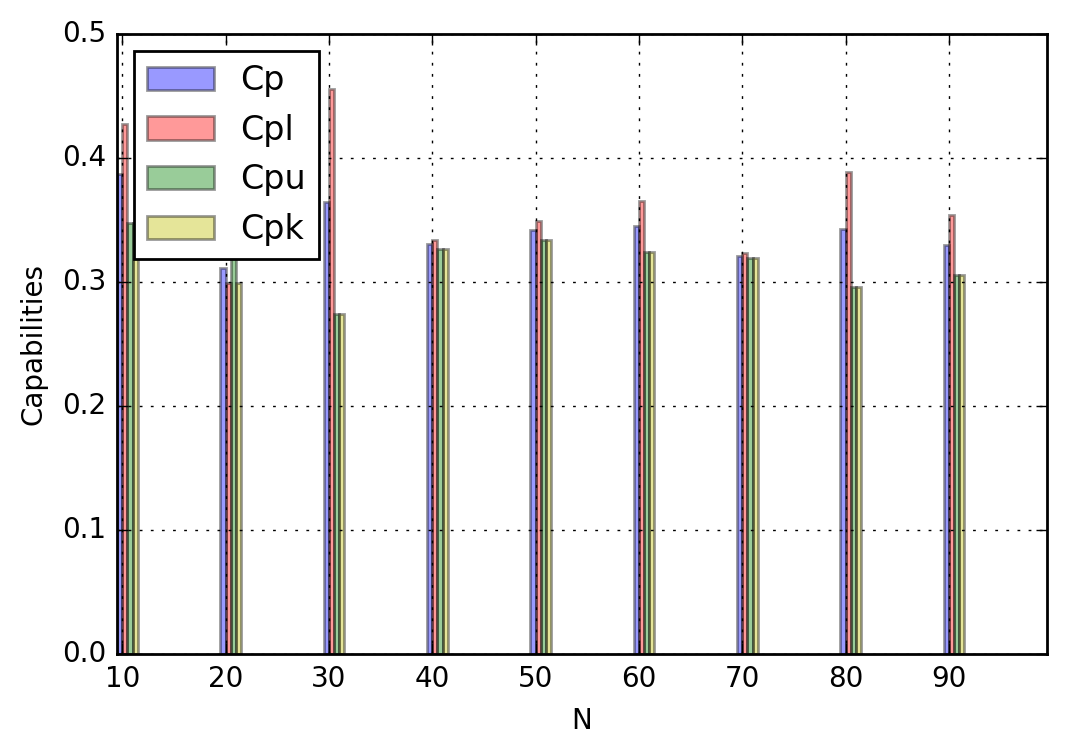

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

n_groups = len(N)
index = np.arange(n_groups)
bar_width = 0.05

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.bar(
    index,
    c_p_s,
    bar_width,
    alpha=opacity,
    color='b',
    label='Cp'
)

plt.bar(
    index + bar_width,
    c_p_l_s,
    bar_width,
    alpha=opacity,
    color='r',
    label='Cpl'
)

plt.bar(
    index + 2 * bar_width,
    c_p_u_s,
    bar_width,
    alpha=opacity,
    color='g',
    label='Cpu'
)

plt.bar(
    index + 3 * bar_width,
    c_p_k_s,
    bar_width,
    alpha=opacity,
    color='y',
    label='Cpk'
)

plt.xlabel('N')
plt.ylabel('Capabilities')
plt.xticks(index + bar_width, N)
plt.legend(loc='best')
plt.grid()